In [18]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

from pydataset import data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

### Clustering Practice with Iris

In [5]:
iris_df = data('iris')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


## Choose Features that aren't used in the Lesson

In [8]:
iris_df = iris_df.rename(columns = {'Sepal.Length': 'sepal_length',   ## <-- rename the columns
                                    'Sepal.Width': 'sepal_width', 
                                    'Petal.Length': 'petal_length',
                                    'Petal.Width': 'petal_width'})

In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


In [11]:
X = iris_df[['sepal_width', 'petal_width']] ## <-- define independent variables for k-means
X.head()

,sepal_width,petal_width
1,3.50,0.20
2,3.00,0.20
3,3.20,0.20
4,3.10,0.20
5,3.60,0.20


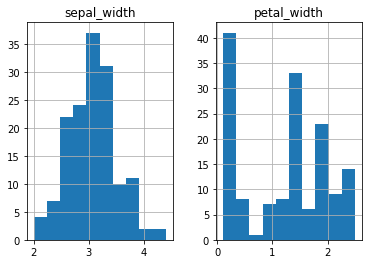

In [12]:
X.hist(); ## <-- Looking at independant variables distributions

In [14]:
## Scaling our X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [15]:
X_scaled.head()  ## <-- Looking at our new scaled dataframe sample

,sepal_width,petal_width
1,1.02,-1.32
2,-0.13,-1.32
3,0.33,-1.32
4,0.10,-1.32
5,1.25,-1.32


In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 123)  ## <-- defining our thing

kmeans.fit(X_scaled)  ## <-- fit

kmeans.predict(X_scaled)   ## <-- predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [21]:
iris_df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [27]:
iris_df.sample(10)  ## <-- grabbing a sample of 10 with cluster columns

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
102,5.80,2.70,5.10,1.90,virginica,1
78,6.70,3.00,5.00,1.70,versicolor,2
46,4.80,3.00,1.40,0.30,setosa,0
61,5.00,2.00,3.50,1.00,versicolor,1
126,7.20,3.20,6.00,1.80,virginica,2
48,4.60,3.20,1.40,0.20,setosa,0
84,6.00,2.70,5.10,1.60,versicolor,1
104,6.30,2.90,5.60,1.80,virginica,2
97,5.70,2.90,4.20,1.30,versicolor,1
71,5.90,3.20,4.80,1.80,versicolor,2


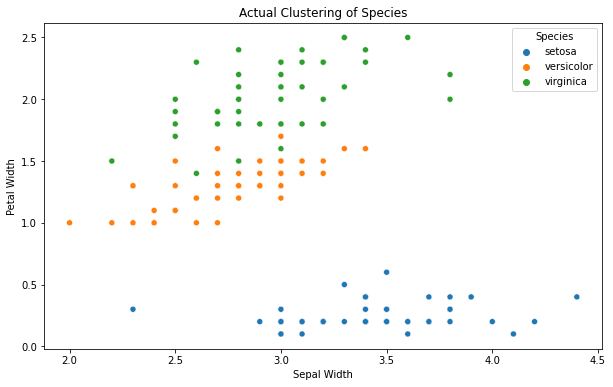

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = iris_df, x = 'sepal_width', y = 'petal_width', hue = 'Species')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Actual Clustering of Species')
plt.show()

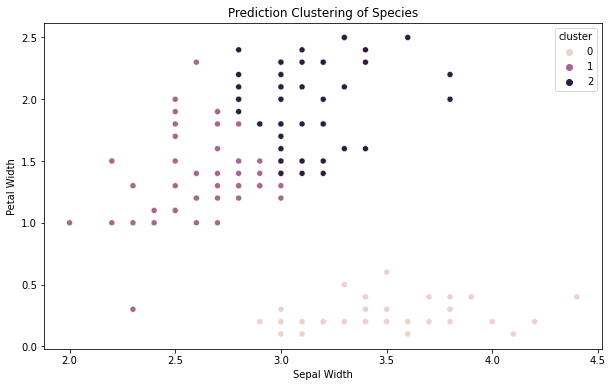

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = iris_df, x = 'sepal_width', y = 'petal_width', hue = 'cluster')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Prediction Clustering of Species')
plt.show()

#### Takeaways from Visuals

The clustering predictions seem to be spot on for the Setosa Species becuase that cluster has the most distance between other species's clusters. 

When predicting Versicolor and Virginica since the distance between the clusters are closer together they are not as accurate versus the Setosa cluster.

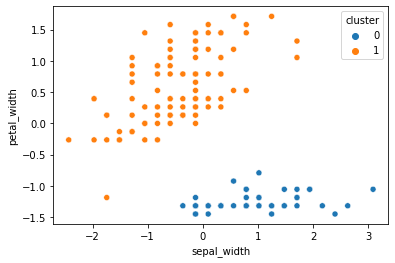

In [47]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(y='petal_width', x='sepal_width', data = X_scaled, hue = 'cluster')
plt.show()

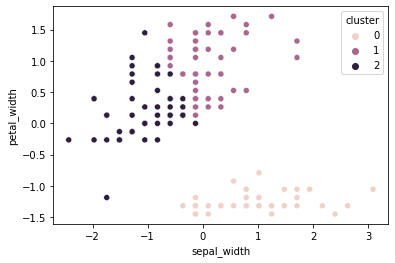

In [46]:
# lets look at two clusters (i.e k = 3)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(y='petal_width', x='sepal_width', data = X_scaled, hue = 'cluster')
plt.show()

#### Elbow Method

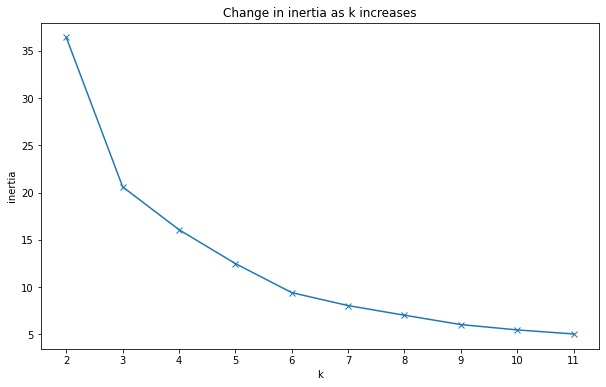

In [39]:
plt.figure(figsize=(10, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range (2,12)}).plot(marker = 'x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.show()

#### Using 3 Different Features

In [51]:
iris_df = data('iris')

iris_df = iris_df.rename(columns = {'Sepal.Length': 'sepal_length',   ## <-- rename the columns
                                    'Sepal.Width': 'sepal_width', 
                                    'Petal.Length': 'petal_length',
                                    'Petal.Width': 'petal_width'})


iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


In [52]:
iris_df['sepal_area'] = iris_df.sepal_width * iris_df.sepal_length
iris_df['petal_area'] = iris_df.petal_length * iris_df.petal_width

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,sepal_area,petal_area
1,5.10,3.50,1.40,0.20,setosa,17.85,0.28
2,4.90,3.00,1.40,0.20,setosa,14.70,0.28
3,4.70,3.20,1.30,0.20,setosa,15.04,0.26
4,4.60,3.10,1.50,0.20,setosa,14.26,0.30
5,5.00,3.60,1.40,0.20,setosa,18.00,0.28


In [53]:
X = iris_df[['petal_area', 'sepal_area', 'sepal_width']]
X.head()

,petal_area,sepal_area,sepal_width
1,0.28,17.85,3.50
2,0.28,14.70,3.00
3,0.26,15.04,3.20
4,0.30,14.26,3.10
5,0.28,18.00,3.60


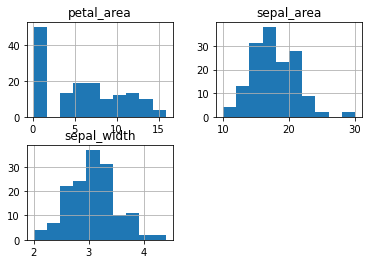

In [54]:
X.hist();

In [56]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

X_scaled.head()

,petal_area,sepal_area,sepal_width
1,-1.17,0.01,1.02
2,-1.17,-0.93,-0.13
3,-1.18,-0.83,0.33
4,-1.17,-1.06,0.10
5,-1.17,0.05,1.25


In [58]:
kmeans = KMeans(n_clusters = 3, random_state = 123)

kmeans.fit(X_scaled)

kmeans.predict(X_scaled)

array([0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [59]:
iris_df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [60]:
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,Species,sepal_area,petal_area,cluster
27,5.00,3.40,1.60,0.40,setosa,17.00,0.64,0
97,5.70,2.90,4.20,1.30,versicolor,16.53,5.46,2
83,5.80,2.70,3.90,1.20,versicolor,15.66,4.68,2
110,7.20,3.60,6.10,2.50,virginica,25.92,15.25,1
48,4.60,3.20,1.40,0.20,setosa,14.72,0.28,0
127,6.20,2.80,4.80,1.80,virginica,17.36,8.64,2
57,6.30,3.30,4.70,1.60,versicolor,20.79,7.52,1
21,5.40,3.40,1.70,0.20,setosa,18.36,0.34,0
125,6.70,3.30,5.70,2.10,virginica,22.11,11.97,1
149,6.20,3.40,5.40,2.30,virginica,21.08,12.42,1


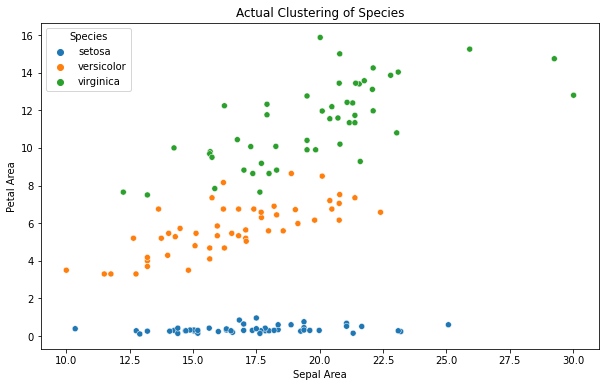

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = iris_df, x = 'sepal_area', y = 'petal_area', hue = 'Species')
plt.xlabel('Sepal Area')
plt.ylabel('Petal Area')
plt.title('Actual Clustering of Species')
plt.show()

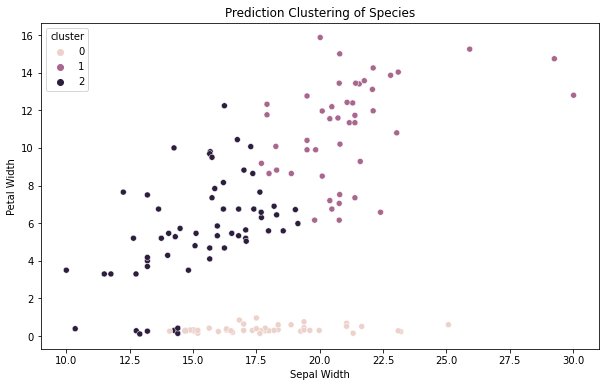

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = iris_df, x = 'sepal_area', y = 'petal_area', hue = 'cluster')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Prediction Clustering of Species')
plt.show()